In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(9098.5771)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 25951.22094  validloss 101989.84207±0.00000  bestvalidloss 101989.84207  last_update 0
train: iter 1  trainloss 2014.84369  validloss 6183.24885±0.00000  bestvalidloss 6183.24885  last_update 0
train: iter 2  trainloss 1577.27729  validloss 5300.91368±0.00000  bestvalidloss 5300.91368  last_update 0
train: iter 3  trainloss 1128.69382  validloss 3369.61968±0.00000  bestvalidloss 3369.61968  last_update 0
train: iter 4  trainloss 1018.66271  validloss 2975.35768±0.00000  bestvalidloss 2975.35768  last_update 0
train: iter 5  trainloss 955.00086  validloss 2615.55996±0.00000  bestvalidloss 2615.55996  last_update 0
train: iter 6  trainloss 909.97756  validloss 2680.40044±0.00000  bestvalidloss 2615.55996  last_update 1
train: iter 7  trainloss 865.10320  validloss 2231.87209±0.00000  bestvalidloss 2231.87209  last_update 0
train: iter 8  trainloss 826.68443  validloss 1951.45674±0.00000  bestvalidloss 1951.45674  last_update 0
train: iter 9  tr

train: iter 77  trainloss -518.18137  validloss -420.84388±0.00000  bestvalidloss -441.42763  last_update 1
train: iter 78  trainloss -467.23788  validloss -380.42639±0.00000  bestvalidloss -441.42763  last_update 2
train: iter 79  trainloss -520.03035  validloss -368.80736±0.00000  bestvalidloss -441.42763  last_update 3
train: iter 80  trainloss -516.58121  validloss -192.48160±0.00000  bestvalidloss -441.42763  last_update 4
train: iter 81  trainloss -622.84472  validloss -485.35826±0.00000  bestvalidloss -485.35826  last_update 0
train: iter 82  trainloss -552.21193  validloss -520.43221±0.00000  bestvalidloss -520.43221  last_update 0
train: iter 83  trainloss -553.01182  validloss -276.69079±0.00000  bestvalidloss -520.43221  last_update 1
train: iter 84  trainloss -656.37233  validloss -508.52405±0.00000  bestvalidloss -520.43221  last_update 2
train: iter 85  trainloss -369.28093  validloss -167.50653±0.00000  bestvalidloss -520.43221  last_update 3
train: iter 86  trainloss -4

train: iter 153  trainloss -800.53114  validloss -749.13665±0.00000  bestvalidloss -834.12364  last_update 10
train: iter 154  trainloss -892.05565  validloss -840.61635±0.00000  bestvalidloss -840.61635  last_update 0
train: iter 155  trainloss -826.58173  validloss -436.41776±0.00000  bestvalidloss -840.61635  last_update 1
train: iter 156  trainloss -905.04122  validloss -785.40236±0.00000  bestvalidloss -840.61635  last_update 2
train: iter 157  trainloss -903.92272  validloss -726.22570±0.00000  bestvalidloss -840.61635  last_update 3
train: iter 158  trainloss -750.96288  validloss -862.30918±0.00000  bestvalidloss -862.30918  last_update 0
train: iter 159  trainloss -911.61938  validloss -825.70972±0.00000  bestvalidloss -862.30918  last_update 1
train: iter 160  trainloss -846.66793  validloss -504.78517±0.00000  bestvalidloss -862.30918  last_update 2
train: iter 161  trainloss -888.59374  validloss -805.23704±0.00000  bestvalidloss -862.30918  last_update 3
train: iter 162  t

train: iter 229  trainloss -1118.53646  validloss -925.21472±0.00000  bestvalidloss -1045.48270  last_update 16
train: iter 230  trainloss -1051.22552  validloss -713.52744±0.00000  bestvalidloss -1045.48270  last_update 17
train: iter 231  trainloss -1152.64750  validloss -887.37711±0.00000  bestvalidloss -1045.48270  last_update 18
train: iter 232  trainloss -1096.93610  validloss -981.26285±0.00000  bestvalidloss -1045.48270  last_update 19
train: iter 233  trainloss -991.74218  validloss -720.00173±0.00000  bestvalidloss -1045.48270  last_update 20
train: iter 234  trainloss -1109.46131  validloss -997.53208±0.00000  bestvalidloss -1045.48270  last_update 21
train: iter 235  trainloss -1117.06659  validloss -1000.04915±0.00000  bestvalidloss -1045.48270  last_update 22
train: iter 236  trainloss -975.50618  validloss -532.35480±0.00000  bestvalidloss -1045.48270  last_update 23
train: iter 237  trainloss -1153.01810  validloss -911.43139±0.00000  bestvalidloss -1045.48270  last_upd

train: iter 303  trainloss -1124.29855  validloss -1137.49750±0.00000  bestvalidloss -1239.97656  last_update 6
train: iter 304  trainloss -1332.41436  validloss -1140.31604±0.00000  bestvalidloss -1239.97656  last_update 7
train: iter 305  trainloss -1140.48026  validloss -727.61542±0.00000  bestvalidloss -1239.97656  last_update 8
train: iter 306  trainloss -1265.35341  validloss -1124.62976±0.00000  bestvalidloss -1239.97656  last_update 9
train: iter 307  trainloss -1200.28919  validloss -1211.98147±0.00000  bestvalidloss -1239.97656  last_update 10
train: iter 308  trainloss -1247.49383  validloss -1003.43612±0.00000  bestvalidloss -1239.97656  last_update 11
train: iter 309  trainloss -1221.09436  validloss -1145.55408±0.00000  bestvalidloss -1239.97656  last_update 12
train: iter 310  trainloss -1246.89182  validloss -883.06126±0.00000  bestvalidloss -1239.97656  last_update 13
train: iter 311  trainloss -1302.59006  validloss -1218.22448±0.00000  bestvalidloss -1239.97656  last

train: iter 377  trainloss -1389.05420  validloss -1299.91937±0.00000  bestvalidloss -1299.91937  last_update 0
train: iter 378  trainloss -1316.20064  validloss -1301.26958±0.00000  bestvalidloss -1301.26958  last_update 0
train: iter 379  trainloss -1118.02610  validloss -1204.63194±0.00000  bestvalidloss -1301.26958  last_update 1
train: iter 380  trainloss -826.78610  validloss -264.52213±0.00000  bestvalidloss -1301.26958  last_update 2
train: iter 381  trainloss -974.40835  validloss -902.58277±0.00000  bestvalidloss -1301.26958  last_update 3
train: iter 382  trainloss -1214.96792  validloss -1026.57666±0.00000  bestvalidloss -1301.26958  last_update 4
train: iter 383  trainloss -1254.02030  validloss -1067.64235±0.00000  bestvalidloss -1301.26958  last_update 5
train: iter 384  trainloss -1232.54703  validloss -1172.69135±0.00000  bestvalidloss -1301.26958  last_update 6
train: iter 385  trainloss -1188.47447  validloss -1074.83028±0.00000  bestvalidloss -1301.26958  last_updat

train: iter 450  trainloss -1419.84776  validloss -1164.58376±0.00000  bestvalidloss -1332.25592  last_update 2
train: iter 451  trainloss -1479.36947  validloss -1333.68162±0.00000  bestvalidloss -1333.68162  last_update 0
train: iter 452  trainloss -1356.28381  validloss -1355.20302±0.00000  bestvalidloss -1355.20302  last_update 0
train: iter 453  trainloss -1334.77590  validloss -1011.43178±0.00000  bestvalidloss -1355.20302  last_update 1
train: iter 454  trainloss -1414.66280  validloss -1325.36730±0.00000  bestvalidloss -1355.20302  last_update 2
train: iter 455  trainloss -1395.77756  validloss -1322.10892±0.00000  bestvalidloss -1355.20302  last_update 3
train: iter 456  trainloss -1418.00427  validloss -1309.94234±0.00000  bestvalidloss -1355.20302  last_update 4
train: iter 457  trainloss -1434.35335  validloss -1316.55605±0.00000  bestvalidloss -1355.20302  last_update 5
train: iter 458  trainloss -1346.91529  validloss -1328.14087±0.00000  bestvalidloss -1355.20302  last_u

train: iter 524  trainloss -1325.11859  validloss -1057.73204±0.00000  bestvalidloss -1379.80562  last_update 51
train: iter 525  trainloss -1462.95916  validloss -1221.13919±0.00000  bestvalidloss -1379.80562  last_update 52
train: iter 526  trainloss -1442.53823  validloss -1335.80157±0.00000  bestvalidloss -1379.80562  last_update 53
train: iter 527  trainloss -1466.50842  validloss -1235.69377±0.00000  bestvalidloss -1379.80562  last_update 54
train: iter 528  trainloss -1518.88713  validloss -1394.26135±0.00000  bestvalidloss -1394.26135  last_update 0
train: iter 529  trainloss -1430.71881  validloss -1360.86528±0.00000  bestvalidloss -1394.26135  last_update 1
train: iter 530  trainloss -1449.82442  validloss -878.03965±0.00000  bestvalidloss -1394.26135  last_update 2
train: iter 531  trainloss -1492.00967  validloss -1343.47507±0.00000  bestvalidloss -1394.26135  last_update 3
train: iter 532  trainloss -1489.85442  validloss -1363.20376±0.00000  bestvalidloss -1394.26135  las

train: iter 598  trainloss -1490.13426  validloss -1427.13416±0.00000  bestvalidloss -1427.13416  last_update 0
train: iter 599  trainloss -1476.54737  validloss -1403.03454±0.00000  bestvalidloss -1427.13416  last_update 1
train: iter 600  trainloss -1519.57632  validloss -1370.44739±0.00000  bestvalidloss -1427.13416  last_update 2
train: iter 601  trainloss -1386.52071  validloss -1350.90118±0.00000  bestvalidloss -1427.13416  last_update 3
train: iter 602  trainloss -1476.07959  validloss -1327.13976±0.00000  bestvalidloss -1427.13416  last_update 4
train: iter 603  trainloss -1486.40433  validloss -1396.30607±0.00000  bestvalidloss -1427.13416  last_update 5
train: iter 604  trainloss -1441.51075  validloss -1325.21377±0.00000  bestvalidloss -1427.13416  last_update 6
train: iter 605  trainloss -1519.62363  validloss -1347.78353±0.00000  bestvalidloss -1427.13416  last_update 7
train: iter 606  trainloss -1521.59136  validloss -1424.03809±0.00000  bestvalidloss -1427.13416  last_u

train: iter 672  trainloss -1528.40088  validloss -1393.68754±0.00000  bestvalidloss -1431.39866  last_update 33
train: iter 673  trainloss -1488.88099  validloss -1393.66424±0.00000  bestvalidloss -1431.39866  last_update 34
train: iter 674  trainloss -1255.70102  validloss -1235.07675±0.00000  bestvalidloss -1431.39866  last_update 35
train: iter 675  trainloss -1472.09094  validloss -1300.08483±0.00000  bestvalidloss -1431.39866  last_update 36
train: iter 676  trainloss -1523.96345  validloss -1305.82239±0.00000  bestvalidloss -1431.39866  last_update 37
train: iter 677  trainloss -1473.00525  validloss -1412.60100±0.00000  bestvalidloss -1431.39866  last_update 38
train: iter 678  trainloss -1401.15603  validloss -835.49695±0.00000  bestvalidloss -1431.39866  last_update 39
train: iter 679  trainloss -1478.56290  validloss -1170.74912±0.00000  bestvalidloss -1431.39866  last_update 40
train: iter 680  trainloss -1515.18352  validloss -1380.57902±0.00000  bestvalidloss -1431.39866 

train: iter 745  trainloss -1487.77628  validloss -1429.21886±0.00000  bestvalidloss -1454.08419  last_update 40
train: iter 746  trainloss -1400.72972  validloss -1362.08542±0.00000  bestvalidloss -1454.08419  last_update 41
train: iter 747  trainloss -1529.89171  validloss -1361.87965±0.00000  bestvalidloss -1454.08419  last_update 42
train: iter 748  trainloss -1547.89001  validloss -1365.14509±0.00000  bestvalidloss -1454.08419  last_update 43
train: iter 749  trainloss -1513.91082  validloss -1426.97173±0.00000  bestvalidloss -1454.08419  last_update 44
train: iter 750  trainloss -1354.33827  validloss -1142.03307±0.00000  bestvalidloss -1454.08419  last_update 45
train: iter 751  trainloss -1459.67200  validloss -1126.84791±0.00000  bestvalidloss -1454.08419  last_update 46
train: iter 752  trainloss -1546.77452  validloss -1398.51673±0.00000  bestvalidloss -1454.08419  last_update 47
train: iter 753  trainloss -1527.99028  validloss -1311.99622±0.00000  bestvalidloss -1454.08419

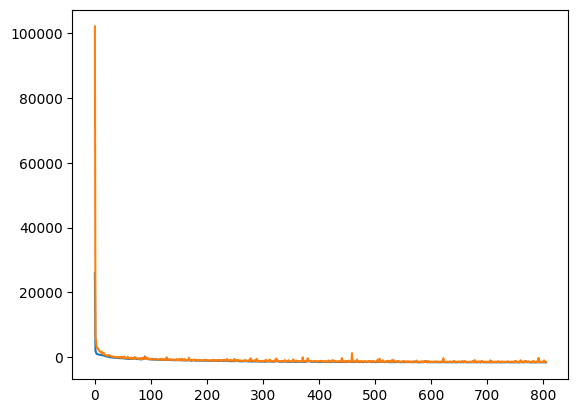

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 9.60148  validloss 10.04462±0.00000  bestvalidloss 10.04462  last_update 0
train: iter 1  trainloss 8.77352  validloss 9.17064±0.00000  bestvalidloss 9.17064  last_update 0
train: iter 2  trainloss 8.09014  validloss 8.38891±0.00000  bestvalidloss 8.38891  last_update 0
train: iter 3  trainloss 7.50745  validloss 7.77532±0.00000  bestvalidloss 7.77532  last_update 0
train: iter 4  trainloss 7.01821  validloss 7.26225±0.00000  bestvalidloss 7.26225  last_update 0
train: iter 5  trainloss 6.59395  validloss 6.79888±0.00000  bestvalidloss 6.79888  last_update 0
train: iter 6  trainloss 6.20966  validloss 6.40390±0.00000  bestvalidloss 6.40390  last_update 0
train: iter 7  trainloss 5.88730  validloss 6.05110±0.00000  bestvalidloss 6.05110  last_update 0
train: iter 8  trainloss 5.61037  validloss 5.73199±0.00000  bestvalidloss 5.73199  last_update 0
train: iter 9  trainloss 5.35470  validloss 5.48423±0.00000  bestvalidloss 5.48423  last_update 0
train: iter 10  tr

train: iter 96  trainloss 0.78953  validloss 0.88332±0.00000  bestvalidloss 0.88332  last_update 0
train: iter 97  trainloss 0.78918  validloss 0.87951±0.00000  bestvalidloss 0.87951  last_update 0
train: iter 98  trainloss 0.75373  validloss 0.81552±0.00000  bestvalidloss 0.81552  last_update 0
train: iter 99  trainloss 0.73041  validloss 0.83198±0.00000  bestvalidloss 0.81552  last_update 1
train: iter 100  trainloss 0.71931  validloss 0.83027±0.00000  bestvalidloss 0.81552  last_update 2
train: iter 101  trainloss 0.70091  validloss 0.78334±0.00000  bestvalidloss 0.78334  last_update 0
train: iter 102  trainloss 0.69122  validloss 0.75338±0.00000  bestvalidloss 0.75338  last_update 0
train: iter 103  trainloss 0.66663  validloss 0.73890±0.00000  bestvalidloss 0.73890  last_update 0
train: iter 104  trainloss 0.64066  validloss 0.73558±0.00000  bestvalidloss 0.73558  last_update 0
train: iter 105  trainloss 0.65072  validloss 0.70706±0.00000  bestvalidloss 0.70706  last_update 0
trai

train: iter 178  trainloss 0.50975  validloss 0.61630±0.00000  bestvalidloss 0.56671  last_update 50
train: iter 179  trainloss 0.52732  validloss 0.63989±0.00000  bestvalidloss 0.56671  last_update 51
train: iter 180  trainloss 0.53886  validloss 0.64010±0.00000  bestvalidloss 0.56671  last_update 52
train: iter 181  trainloss 0.53522  validloss 0.60828±0.00000  bestvalidloss 0.56671  last_update 53
train: iter 182  trainloss 0.52568  validloss 0.68039±0.00000  bestvalidloss 0.56671  last_update 54
train: iter 183  trainloss 0.52349  validloss 0.68283±0.00000  bestvalidloss 0.56671  last_update 55
train: iter 184  trainloss 0.50414  validloss 0.62340±0.00000  bestvalidloss 0.56671  last_update 56
train: iter 185  trainloss 0.53049  validloss 0.59547±0.00000  bestvalidloss 0.56671  last_update 57
train: iter 186  trainloss 0.49306  validloss 0.73650±0.00000  bestvalidloss 0.56671  last_update 58
train: iter 187  trainloss 0.50338  validloss 0.64914±0.00000  bestvalidloss 0.56671  last_

train: iter 263  trainloss 0.54287  validloss 0.60871±0.00000  bestvalidloss 0.56527  last_update 44
train: iter 264  trainloss 0.51573  validloss 0.66282±0.00000  bestvalidloss 0.56527  last_update 45
train: iter 265  trainloss 0.50987  validloss 0.55694±0.00000  bestvalidloss 0.55694  last_update 0
train: iter 266  trainloss 0.52149  validloss 0.63448±0.00000  bestvalidloss 0.55694  last_update 1
train: iter 267  trainloss 0.50105  validloss 0.62100±0.00000  bestvalidloss 0.55694  last_update 2
train: iter 268  trainloss 0.52079  validloss 0.66904±0.00000  bestvalidloss 0.55694  last_update 3
train: iter 269  trainloss 0.50438  validloss 0.60659±0.00000  bestvalidloss 0.55694  last_update 4
train: iter 270  trainloss 0.54003  validloss 0.65212±0.00000  bestvalidloss 0.55694  last_update 5
train: iter 271  trainloss 0.50946  validloss 0.68425±0.00000  bestvalidloss 0.55694  last_update 6
train: iter 272  trainloss 0.52287  validloss 0.61933±0.00000  bestvalidloss 0.55694  last_update 

train: iter 348  trainloss 0.49895  validloss 0.62634±0.00000  bestvalidloss 0.55694  last_update 83
train: iter 349  trainloss 0.51863  validloss 0.58473±0.00000  bestvalidloss 0.55694  last_update 84
train: iter 350  trainloss 0.53004  validloss 0.74006±0.00000  bestvalidloss 0.55694  last_update 85
train: iter 351  trainloss 0.51515  validloss 0.63845±0.00000  bestvalidloss 0.55694  last_update 86
train: iter 352  trainloss 0.52257  validloss 0.72851±0.00000  bestvalidloss 0.55694  last_update 87
train: iter 353  trainloss 0.52244  validloss 0.63936±0.00000  bestvalidloss 0.55694  last_update 88
train: iter 354  trainloss 0.52061  validloss 0.64891±0.00000  bestvalidloss 0.55694  last_update 89
train: iter 355  trainloss 0.53832  validloss 0.66746±0.00000  bestvalidloss 0.55694  last_update 90
train: iter 356  trainloss 0.52010  validloss 0.72139±0.00000  bestvalidloss 0.55694  last_update 91
train: iter 357  trainloss 0.54345  validloss 0.67839±0.00000  bestvalidloss 0.55694  last_

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([ 1.4259, -3.7522, -1.3210, -3.3112], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 69.72273  validloss 72.58598±0.00000  bestvalidloss 72.58598  last_update 0
train: iter 1  trainloss 49.55155  validloss 57.78816±0.00000  bestvalidloss 57.78816  last_update 0
train: iter 2  trainloss 33.21339  validloss 38.87244±0.00000  bestvalidloss 38.87244  last_update 0
train: iter 3  trainloss 24.27480  validloss 28.91572±0.00000  bestvalidloss 28.91572  last_update 0
train: iter 4  trainloss 19.02547  validloss 22.99849±0.00000  bestvalidloss 22.99849  last_update 0
train: iter 5  trainloss 15.52152  validloss 19.69577±0.00000  bestvalidloss 19.69577  last_update 0
train: iter 6  trainloss 13.08680  validloss 16.97206±0.00000  bestvalidloss 16.97206  last_update 0
train: iter 7  trainloss 11.28497  validloss 15.53086±0.00000  bestvalidloss 15.53086  last_update 0
train: iter 8  trainloss 10.01069  validloss 14.13333±0.00000  bestvalidloss 14.13333  last_update 0
train: iter 9  trainloss 9.06958  validloss 13.86066±0.00000  bestvalidloss 13.86066  last_

train: iter 84  trainloss 3.12930  validloss 7.86295±0.00000  bestvalidloss 7.25645  last_update 42
train: iter 85  trainloss 3.06025  validloss 7.53966±0.00000  bestvalidloss 7.25645  last_update 43
train: iter 86  trainloss 3.12058  validloss 7.62332±0.00000  bestvalidloss 7.25645  last_update 44
train: iter 87  trainloss 3.06312  validloss 7.32204±0.00000  bestvalidloss 7.25645  last_update 45
train: iter 88  trainloss 3.11885  validloss 7.88683±0.00000  bestvalidloss 7.25645  last_update 46
train: iter 89  trainloss 3.10165  validloss 8.11257±0.00000  bestvalidloss 7.25645  last_update 47
train: iter 90  trainloss 3.05809  validloss 7.65519±0.00000  bestvalidloss 7.25645  last_update 48
train: iter 91  trainloss 3.13899  validloss 8.50577±0.00000  bestvalidloss 7.25645  last_update 49
train: iter 92  trainloss 3.05846  validloss 8.11226±0.00000  bestvalidloss 7.25645  last_update 50
train: iter 93  trainloss 3.06881  validloss 8.03467±0.00000  bestvalidloss 7.25645  last_update 51


train: iter 168  trainloss 3.10677  validloss 8.27201±0.00000  bestvalidloss 7.05717  last_update 38
train: iter 169  trainloss 3.05081  validloss 8.56088±0.00000  bestvalidloss 7.05717  last_update 39
train: iter 170  trainloss 3.02537  validloss 8.74994±0.00000  bestvalidloss 7.05717  last_update 40
train: iter 171  trainloss 3.06407  validloss 7.88426±0.00000  bestvalidloss 7.05717  last_update 41
train: iter 172  trainloss 3.01794  validloss 7.94479±0.00000  bestvalidloss 7.05717  last_update 42
train: iter 173  trainloss 3.00006  validloss 9.10317±0.00000  bestvalidloss 7.05717  last_update 43
train: iter 174  trainloss 3.03110  validloss 7.55641±0.00000  bestvalidloss 7.05717  last_update 44
train: iter 175  trainloss 3.01760  validloss 8.36659±0.00000  bestvalidloss 7.05717  last_update 45
train: iter 176  trainloss 3.04320  validloss 7.43391±0.00000  bestvalidloss 7.05717  last_update 46
train: iter 177  trainloss 3.02559  validloss 8.48109±0.00000  bestvalidloss 7.05717  last_

train: iter 252  trainloss 3.00798  validloss 8.01954±0.00000  bestvalidloss 7.05454  last_update 62
train: iter 253  trainloss 3.01564  validloss 8.14182±0.00000  bestvalidloss 7.05454  last_update 63
train: iter 254  trainloss 3.01412  validloss 8.20175±0.00000  bestvalidloss 7.05454  last_update 64
train: iter 255  trainloss 2.99279  validloss 7.31842±0.00000  bestvalidloss 7.05454  last_update 65
train: iter 256  trainloss 2.97890  validloss 7.57285±0.00000  bestvalidloss 7.05454  last_update 66
train: iter 257  trainloss 3.04164  validloss 7.26924±0.00000  bestvalidloss 7.05454  last_update 67
train: iter 258  trainloss 3.03878  validloss 7.53906±0.00000  bestvalidloss 7.05454  last_update 68
train: iter 259  trainloss 2.98124  validloss 7.95993±0.00000  bestvalidloss 7.05454  last_update 69
train: iter 260  trainloss 2.98200  validloss 8.72865±0.00000  bestvalidloss 7.05454  last_update 70
train: iter 261  trainloss 3.03131  validloss 7.74581±0.00000  bestvalidloss 7.05454  last_

train: iter 336  trainloss 3.03056  validloss 7.81259±0.00000  bestvalidloss 7.03491  last_update 57
train: iter 337  trainloss 3.00761  validloss 8.13863±0.00000  bestvalidloss 7.03491  last_update 58
train: iter 338  trainloss 2.97179  validloss 8.65542±0.00000  bestvalidloss 7.03491  last_update 59
train: iter 339  trainloss 2.98862  validloss 8.25876±0.00000  bestvalidloss 7.03491  last_update 60
train: iter 340  trainloss 2.98889  validloss 8.67430±0.00000  bestvalidloss 7.03491  last_update 61
train: iter 341  trainloss 3.00088  validloss 8.13116±0.00000  bestvalidloss 7.03491  last_update 62
train: iter 342  trainloss 2.98851  validloss 8.14847±0.00000  bestvalidloss 7.03491  last_update 63
train: iter 343  trainloss 2.96447  validloss 8.46005±0.00000  bestvalidloss 7.03491  last_update 64
train: iter 344  trainloss 2.97605  validloss 8.02377±0.00000  bestvalidloss 7.03491  last_update 65
train: iter 345  trainloss 3.06875  validloss 7.62188±0.00000  bestvalidloss 7.03491  last_

train: iter 420  trainloss 3.04984  validloss 8.69166±0.00000  bestvalidloss 6.99105  last_update 18
train: iter 421  trainloss 3.00962  validloss 7.92201±0.00000  bestvalidloss 6.99105  last_update 19
train: iter 422  trainloss 2.98225  validloss 8.43540±0.00000  bestvalidloss 6.99105  last_update 20
train: iter 423  trainloss 3.00331  validloss 8.52131±0.00000  bestvalidloss 6.99105  last_update 21
train: iter 424  trainloss 3.01123  validloss 8.54802±0.00000  bestvalidloss 6.99105  last_update 22
train: iter 425  trainloss 3.02324  validloss 8.81806±0.00000  bestvalidloss 6.99105  last_update 23
train: iter 426  trainloss 2.99931  validloss 8.39381±0.00000  bestvalidloss 6.99105  last_update 24
train: iter 427  trainloss 2.97457  validloss 7.67850±0.00000  bestvalidloss 6.99105  last_update 25
train: iter 428  trainloss 2.97227  validloss 8.00216±0.00000  bestvalidloss 6.99105  last_update 26
train: iter 429  trainloss 2.93636  validloss 7.93615±0.00000  bestvalidloss 6.99105  last_

train: fin


In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-6.9585)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-4.0745)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.21929953144475964
tensor([-1.3513])
